In [1]:
from qiskit import QuantumCircuit, QiskitError
#from qiskit import execute, BasicAer
import qiskit.ignis.verification.randomized_benchmarking as rb
#import qiskit.test.benchmarks.randomized_benchmarking as br
import pyzx
from pyzx.circuit.qasmparser import QASMParser
from pyzx.circuit.qiskitqasmparser import QiskitQASMParser

In [488]:
#qc = rb.randomized_benchmarking_seq()
qc = rb.randomized_benchmarking_seq(nseeds=1, length_vector=None,
                                rb_pattern=[[0,1]],
                                length_multiplier=1, seed_offset=0,
                                align_cliffs=False,
                                interleaved_gates=None,
                                is_purity=False)
qc = qc[0][0][0]
type(qc)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [489]:
# setting up the backend
# print(BasicAer.backends())

# running the job
# job_sim = execute(qc, BasicAer.get_backend('qasm_simulator'))
# sim_result = job_sim.result()

In [490]:
# print("\nPrint all gates:")
# [print(dat) for dat in qc.data]

In [491]:
qasm = qc.qasm()
#qasm = '\n'.join(['' if line.startswith("barrier") else line for line in qasm.splitlines()])

print("\nPrint QASM:")
print(qasm)

# failed:
# OPENQASM 2.0;
# include "qelib1.inc";
# qreg qr[2];
# creg cr[2];
# h qr[1];
# sdg qr[0];
# h qr[0];
# sdg qr[1];
# h qr[1];
# cx qr[0],qr[1];
# cx qr[1],qr[0];
# z qr[0];
# barrier qr[0],qr[1];
# z qr[0];
# cx qr[1],qr[0];
# cx qr[0],qr[1];
# h qr[1];
# s qr[1];
# h qr[0];
# s qr[0];
# h qr[1];
# measure qr[0] -> cr[0];
# measure qr[1] -> cr[1];





Print QASM:
OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];
h qr[0];
h qr[1];
sdg qr[0];
h qr[0];
sdg qr[1];
h qr[1];
cx qr[0],qr[1];
cx qr[1],qr[0];
sdg qr[0];
h qr[0];
h qr[1];
s qr[1];
x qr[0];
z qr[1];
barrier qr[0],qr[1];
z qr[1];
x qr[0];
sdg qr[1];
h qr[1];
h qr[0];
s qr[0];
cx qr[1],qr[0];
cx qr[0],qr[1];
h qr[1];
s qr[1];
h qr[0];
s qr[0];
h qr[1];
h qr[0];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];



In [492]:
# Draw the circuit
print(qc)

         ┌───┐┌─────┐┌───┐     ┌───┐┌─────┐┌───┐┌───┐ ░ ┌───┐ ┌───┐ ┌───┐┌───┐»
qr_0: |0>┤ H ├┤ Sdg ├┤ H ├──■──┤ X ├┤ Sdg ├┤ H ├┤ X ├─░─┤ X ├─┤ H ├─┤ S ├┤ X ├»
         ├───┤├─────┤├───┤┌─┴─┐└─┬─┘└┬───┬┘├───┤├───┤ ░ ├───┤┌┴───┴┐├───┤└─┬─┘»
qr_1: |0>┤ H ├┤ Sdg ├┤ H ├┤ X ├──■───┤ H ├─┤ S ├┤ Z ├─░─┤ Z ├┤ Sdg ├┤ H ├──■──»
         └───┘└─────┘└───┘└───┘      └───┘ └───┘└───┘ ░ └───┘└─────┘└───┘     »
 cr_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
 cr_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
«           ┌───┐┌───┐┌───┐┌─┐   
«qr_0: ──■──┤ H ├┤ S ├┤ H ├┤M├───
«      ┌─┴─┐├───┤├───┤├───┤└╥┘┌─┐
«qr_1: ┤ X ├┤ H ├┤ S ├┤ H ├─╫─┤M├
«      └───┘└───┘└───┘└───┘ ║ └╥┘
«cr_0: ═════════════════════╩══╬═
«                              ║ 
«cr_1: ════════════════════════╩═
«       

In [493]:
p = QiskitQASMParser()
circ_list, whichpyzx = p.qiskitparse(qasm)
print(circ_list)
print(whichpyzx)
print(p.registers)

['qreg qr[2];', 'creg cr[2];', Circuit(2 qubits, 14 gates), 'barrier qr[0],qr[1];', Circuit(2 qubits, 14 gates), 'measure qr[0] -> cr[0];', 'measure qr[1] -> cr[1];']
[2, 4]
{'qr': (0, 2)}


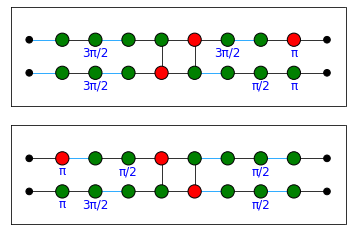

In [494]:
#qasm = qc.decompose().qasm()
pyzx.draw_many(circ_list, whichpyzx)

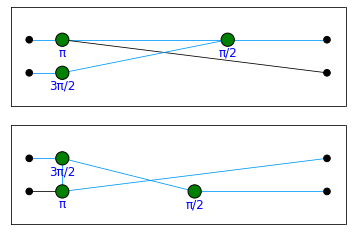

In [495]:
graph_list = [circ_list[w].to_graph() for w in whichpyzx]
[pyzx.full_reduce(g) for g in graph_list]
pyzx.draw_many(graph_list, range(len(whichpyzx)))

In [496]:
pyzx_circ_list = [pyzx.extract.streaming_extract(g) for g in graph_list]

for i in range(len(pyzx_circ_list)):
    prev = pyzx_circ_list[i]
    next = pyzx.extract.streaming_extract(graph_list[i])
    while prev.gates != next.gates:
        for gate in next.gates:
            pyzx_circ_list[i].add_gate(gate)
        prev = next
        next = pyzx.extract.streaming_extract(graph_list[i])

pyzx_circ_list = [pyzx.optimize.basic_optimization(new_c.to_basic_gates()) for new_c in pyzx_circ_list]

pyzx_qasm = [new_c.to_basic_gates().to_qasm() for new_c in pyzx_circ_list]

pyzx_qasm = ["\n".join(['' if line.startswith("qreg") else line for line in circ.splitlines()[2:]]) for circ in pyzx_qasm]

for new_qasm in pyzx_qasm:
    [print(line) for line in new_qasm.splitlines()]
    print()


h q[0];
z q[0];
rz(0.5*pi) q[1];
cx q[0], q[1];
x q[1];


cx q[1], q[0];
h q[1];
rz(0.5*pi) q[0];
x q[0];
x q[1];



In [497]:
#now we need to map registers and glue all the pieces back together
for i in range(len(pyzx_qasm)):
    circ_list[whichpyzx[i]] = pyzx_qasm[i]
#print(circ_list)
## join the
qasm_string = 'OPENQASM 2.0;\ninclude "qelib1.inc";\n'+"\n".join(circ_list)
qasm_string = qasm_string.replace('q[', 'qr[')
print(qasm_string)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];

h qr[0];
z qr[0];
rz(0.5*pi) qr[1];
cx qr[0], qr[1];
x qr[1];
barrier qr[0],qr[1];

cx qr[1], qr[0];
h qr[1];
rz(0.5*pi) qr[0];
x qr[0];
x qr[1];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];


In [498]:
# pqsl = [line + "\n" for line in pyzx_qasm] #took out .splitlines()
# qsl = [line + "\n" for line in qasm.splitlines()]
# # print(pqsl)
# # print(qsl)
# new_qasm = '\n'.join(qsl[0:4]) + ''.join(pqsl[3:]) + ''.join(qsl[-2:])
# new_qasm = new_qasm.replace('q[', 'qr[')
# print(new_qasm)

In [499]:
new_qc = qc.from_qasm_str(qasm_string)
print(new_qc)

             ┌───┐     ┌───┐           ░ ┌───┐┌────────────┐┌───┐┌─┐   
qr_0: |0>────┤ H ├─────┤ Z ├──■────────░─┤ X ├┤ Rz(0.5*pi) ├┤ X ├┤M├───
         ┌───┴───┴────┐└───┘┌─┴─┐┌───┐ ░ └─┬─┘└───┬───┬────┘├───┤└╥┘┌─┐
qr_1: |0>┤ Rz(0.5*pi) ├─────┤ X ├┤ X ├─░───■──────┤ H ├─────┤ X ├─╫─┤M├
         └────────────┘     └───┘└───┘ ░          └───┘     └───┘ ║ └╥┘
 cr_0: 0 ═════════════════════════════════════════════════════════╩══╬═
                                                                     ║ 
 cr_1: 0 ════════════════════════════════════════════════════════════╩═
                                                                       


In [500]:
print(qc)

         ┌───┐┌─────┐┌───┐     ┌───┐┌─────┐┌───┐┌───┐ ░ ┌───┐ ┌───┐ ┌───┐┌───┐»
qr_0: |0>┤ H ├┤ Sdg ├┤ H ├──■──┤ X ├┤ Sdg ├┤ H ├┤ X ├─░─┤ X ├─┤ H ├─┤ S ├┤ X ├»
         ├───┤├─────┤├───┤┌─┴─┐└─┬─┘└┬───┬┘├───┤├───┤ ░ ├───┤┌┴───┴┐├───┤└─┬─┘»
qr_1: |0>┤ H ├┤ Sdg ├┤ H ├┤ X ├──■───┤ H ├─┤ S ├┤ Z ├─░─┤ Z ├┤ Sdg ├┤ H ├──■──»
         └───┘└─────┘└───┘└───┘      └───┘ └───┘└───┘ ░ └───┘└─────┘└───┘     »
 cr_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
 cr_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
«           ┌───┐┌───┐┌───┐┌─┐   
«qr_0: ──■──┤ H ├┤ S ├┤ H ├┤M├───
«      ┌─┴─┐├───┤├───┤├───┤└╥┘┌─┐
«qr_1: ┤ X ├┤ H ├┤ S ├┤ H ├─╫─┤M├
«      └───┘└───┘└───┘└───┘ ║ └╥┘
«cr_0: ═════════════════════╩══╬═
«                              ║ 
«cr_1: ════════════════════════╩═
«       

In [501]:
import qiskit
from qiskit.providers.basicaer import QasmSimulatorPy
c1 = qiskit.execute(qc, QasmSimulatorPy()).result().get_counts()
c2 = qiskit.execute(new_qc, QasmSimulatorPy()).result().get_counts()

In [502]:
c1

{'00': 1024}

In [503]:
c2

{'00': 1024}

In [504]:
qc.depth()

17

In [505]:
qc.size()

30

In [506]:
new_qc.depth()

8

In [507]:
new_qc.size()

12

In [525]:
new_new_qc = qiskit.transpile(qc, basis_gates=['u3', 'cx'], optimization_level=2)

In [526]:
print(new_new_qc)

         ┌─────────────────────┐     ┌───┐ ┌──────────────────┐ ░ »
qr_0: |0>┤ U3(pi/2,pi/2,3pi/2) ├──■──┤ X ├─┤ U3(pi/2,0,3pi/2) ├─░─»
         ├─────────────────────┤┌─┴─┐└─┬─┘┌┴──────────────────┤ ░ »
qr_1: |0>┤ U3(pi/2,pi/2,3pi/2) ├┤ X ├──■──┤ U3(pi/2,-pi/2,pi) ├─░─»
         └─────────────────────┘└───┘     └───────────────────┘ ░ »
 cr_0: 0 ═════════════════════════════════════════════════════════»
                                                                  »
 cr_1: 0 ═════════════════════════════════════════════════════════»
                                                                  »
«      ┌───────────────────┐┌───┐     ┌─────────────────────┐┌─┐   
«qr_0: ┤ U3(pi/2,-pi/2,pi) ├┤ X ├──■──┤ U3(pi/2,-pi/2,pi/2) ├┤M├───
«      └──┬─────────────┬──┘└─┬─┘┌─┴─┐├─────────────────────┤└╥┘┌─┐
«qr_1: ───┤ U2(0,3pi/2) ├─────■──┤ X ├┤ U3(pi/2,-pi/2,pi/2) ├─╫─┤M├
«         └─────────────┘        └───┘└─────────────────────┘ ║ └╥┘
«cr_0: ═════════════════════════════════════════

In [527]:
new_new_qc.depth()

9

In [518]:
new_new_qc.size()

14

In [512]:
doubly_qc = qiskit.transpile(new_qc, basis_gates=['u3', 'cx'], optimization_level=2)
print(doubly_qc)

         ┌────────────────┐                     ░ ┌───┐┌────────────────┐┌─┐   
qr_0: |0>┤ U3(pi/2,pi,pi) ├──■──────────────────░─┤ X ├┤ U3(pi,0,3pi/2) ├┤M├───
         └──┬──────────┬──┘┌─┴─┐┌─────────────┐ ░ └─┬─┘├────────────────┤└╥┘┌─┐
qr_1: |0>───┤ U1(pi/2) ├───┤ X ├┤ U3(pi,0,pi) ├─░───■──┤ U3(pi/2,0,2pi) ├─╫─┤M├
            └──────────┘   └───┘└─────────────┘ ░      └────────────────┘ ║ └╥┘
 cr_0: 0 ═════════════════════════════════════════════════════════════════╩══╬═
                                                                             ║ 
 cr_1: 0 ════════════════════════════════════════════════════════════════════╩═
                                                                               


In [513]:
doubly_qc.depth()

6

In [514]:
doubly_qc.size()

9

In [529]:
c3 = qiskit.execute(new_new_qc, QasmSimulatorPy()).result().get_counts()
c4 = qiskit.execute(doubly_qc, QasmSimulatorPy()).result().get_counts()
c3

{'00': 1024}

In [530]:
c4

{'00': 1024}